In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('../inputs/train.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
print(f'DataFrame has {df.shape[0]} of Rows, and {df.shape[1]} of Columns')
print(df.columns)

DataFrame has 4600 of Rows, and 18 of Columns
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [4]:
# dopping features (date, street, and country)
df = df.drop(['date', 'street', 'country'], axis=1)

In [5]:
# create a pandas dataframe of each features, data-type, percentage of num of null values

df_details = pd.DataFrame(df.dtypes).T.rename(index={0:'datatype'})
df_details = df_details.append(pd.DataFrame(df.isnull().sum()/len(df)*100).T.rename(index={0:'pct_null_values'}))
df_details

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
datatype,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,object,object
pct_null_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# DATA CLEANING 

# set price as target values 
# fix yr_built and yr_renovated
# check city value counts and one-hot-encode
# clean state-zip and mean encode it 

In [7]:
# get the number of years since being buily
df.yr_built = 2021 - df.yr_built

In [8]:
# get the number of years since being renovated, if not set to 0
df.yr_renovated = 2021 - df.yr_renovated
df.yr_renovated = np.where(df.yr_renovated > 2020, 0, df.yr_renovated)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


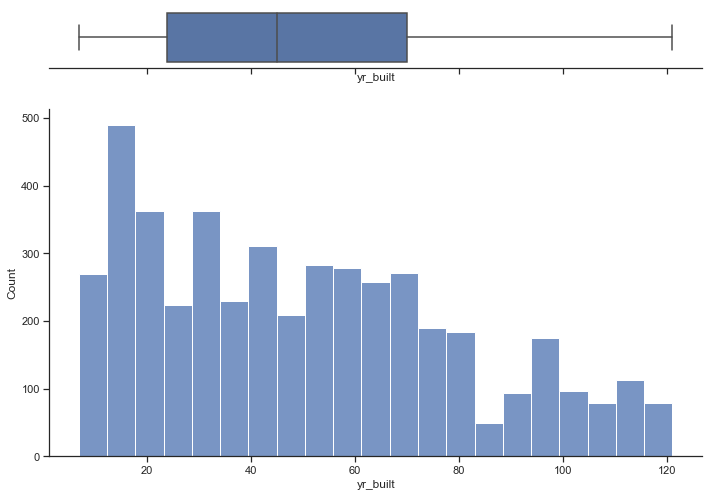

In [ ]:

sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(11.7, 8.27),
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.yr_built, ax=ax_box)
sns.histplot(df.yr_built, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.savefig('../plots/year_built_dist.png')

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


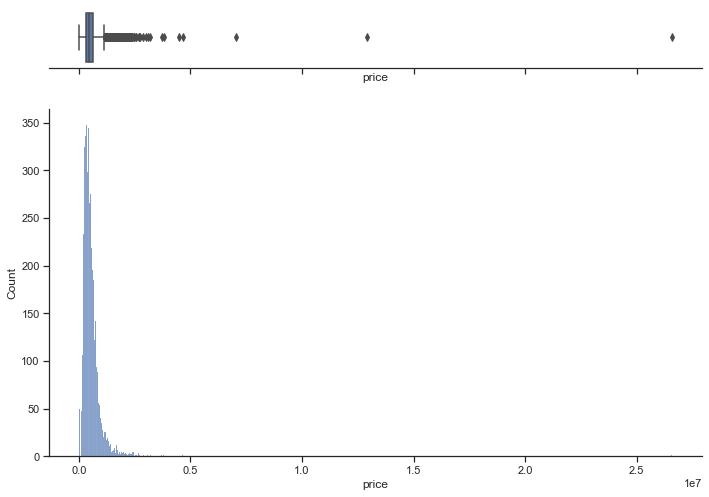

In [ ]:

sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(11.7, 8.27),
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.price, ax=ax_box)
sns.histplot(df.price, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.savefig('../plots/price_skewed_distribution.png')

In [11]:
# filter out outliers that are greater than 3 std from mean on target values 

outliers = []
def detect_outliers(col):
    mu = np.mean(col)
    std = np.std(col)
    
    for i in col:
        z_score = (i - mu)/ std
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers
    

outlier_pt=detect_outliers(df.price)
print(df.price.shape)
df = df[~df.price.isin(outlier_pt)]
print(df.shape)

(4600,)
(4566, 15)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


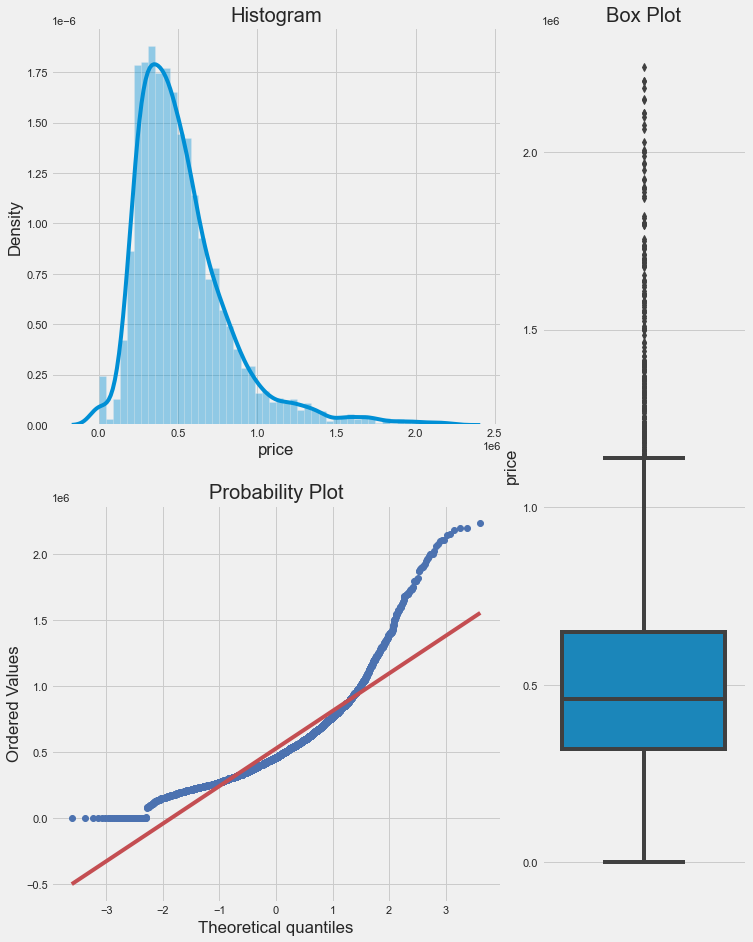

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec

def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,15))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    # sns.boxplot(df.loc[:,feature], orient='v', ax = ax3)
    sns.boxplot(y=df.price, orient='v', ax = ax3)

plotting_3_chart(df, 'price')
plt.savefig('../plots/price_cleaned_distribution.png')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

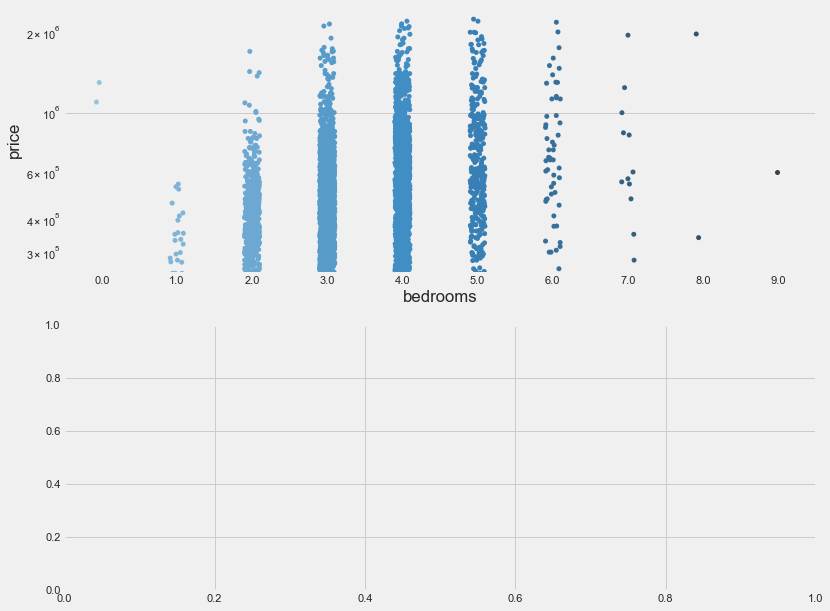

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.set(yscale = "log")
sns.stripplot(x = "bedrooms", y = "price", data = df, ax = ax1, jitter=True, palette="Blues_d")

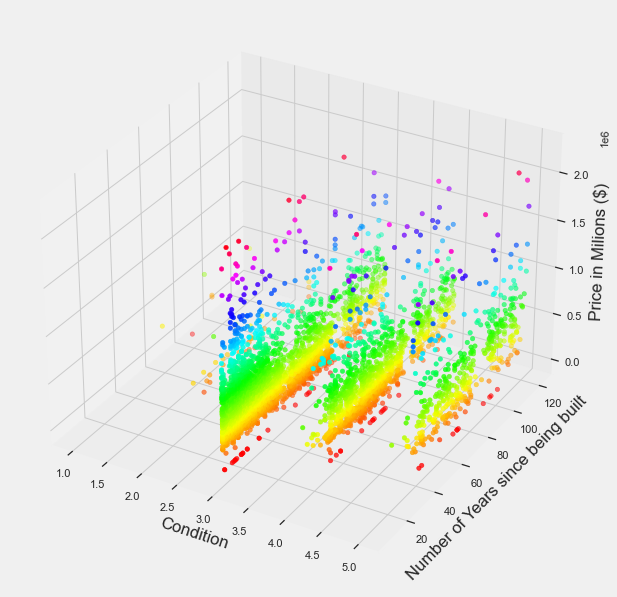

In [ ]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = df['price']
x_points = df['condition']
y_points = df['yr_built']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')

ax.set_xlabel('Condition')
ax.set_ylabel('Number of Years since being built')
ax.set_zlabel('Price in Milions ($)')
plt.show()
plt.savefig('../plots/price_conditions_yrbuilt.png')

In [16]:
# remove WA from statezip zip column and convert to int64
df.statezip = df.statezip.str.replace(r'\D', '')
df.statezip = pd.to_numeric(df.statezip,errors='coerce')

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [17]:
# get city unique values
print(len(df.city.value_counts()))
# extract the top ten and one hot encode 
top_10 = [x for x in df.city.value_counts().sort_values(ascending=False).head(10).index]
print(top_10)

44
['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Issaquah', 'Kirkland', 'Kent', 'Auburn', 'Sammamish', 'Federal Way']


In [18]:
df_ohe_city = df.copy()

def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)
        
        
one_hot_top_x(df_ohe_city, 'city', top_10)

df_ohe_city.drop('city', axis=1, inplace=True)

df_ohe_city.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'statezip', 'city_Seattle', 'city_Renton',
       'city_Bellevue', 'city_Redmond', 'city_Issaquah', 'city_Kirkland',
       'city_Kent', 'city_Auburn', 'city_Sammamish', 'city_Federal Way'],
      dtype='object')

In [19]:
df_ohe_city.statezip.value_counts()

98103    148
98052    135
98117    132
98115    130
98006    110
        ... 
98039      6
98288      3
98050      2
98354      2
98068      1
Name: statezip, Length: 77, dtype: int64

In [20]:
# feature engineer the zipcode by target encoding 
# getting the mean price (target value) for each zipcode 
city_target_encode = df_ohe_city.groupby(['statezip'])['price'].mean().to_dict()
df_ohe_city['statezip'] =  df_ohe_city['statezip'].map(city_target_encode)


In [21]:
df_target_encode = df.copy()

In [22]:
city_target_encode = df_target_encode.groupby(['city'])['price'].mean().to_dict()
df_target_encode['city'] =  df_target_encode['city'].map(city_target_encode)


city_target_encode = df_target_encode.groupby(['statezip'])['price'].mean().to_dict()
df_target_encode['statezip'] =  df_target_encode['statezip'].map(city_target_encode)

df_target_encode

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,66,16,420392.364047,374433.232975
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,55,0,297370.120978,320243.968571
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,58,0,800504.147577,560166.428571
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,45,29,660759.148178,637555.719367
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,83,27,556957.043399,595086.468132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,67,42,556957.043399,374433.232975
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,38,12,800504.147577,639103.418803
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,12,0,377040.966329,499455.770108
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,47,0,556957.043399,263912.457483


In [23]:
city_target_encode = df.groupby(['city'])['price'].mean().to_dict()
df['city'] =  df['city'].map(city_target_encode)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,66,16,420392.364047,98133
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,55,0,297370.120978,98042
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,58,0,800504.147577,98008
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,45,29,660759.148178,98052
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,83,27,556957.043399,98115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,67,42,556957.043399,98133
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,38,12,800504.147577,98007
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,12,0,377040.966329,98059
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,47,0,556957.043399,98178


In [24]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,66,16,420392.364047,98133
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,55,0,297370.120978,98042
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,58,0,800504.147577,98008
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,45,29,660759.148178,98052
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,83,27,556957.043399,98115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,67,42,556957.043399,98133
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,38,12,800504.147577,98007
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,12,0,377040.966329,98059
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,47,0,556957.043399,98178


<AxesSubplot:>

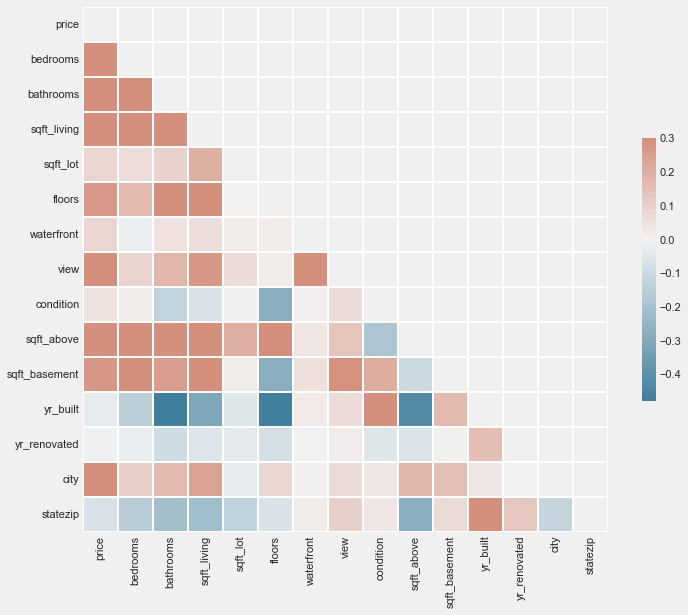

In [ ]:
# plt correlation with df with city being traget encoded

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('../plots/train_clean_corr.png')

<AxesSubplot:>

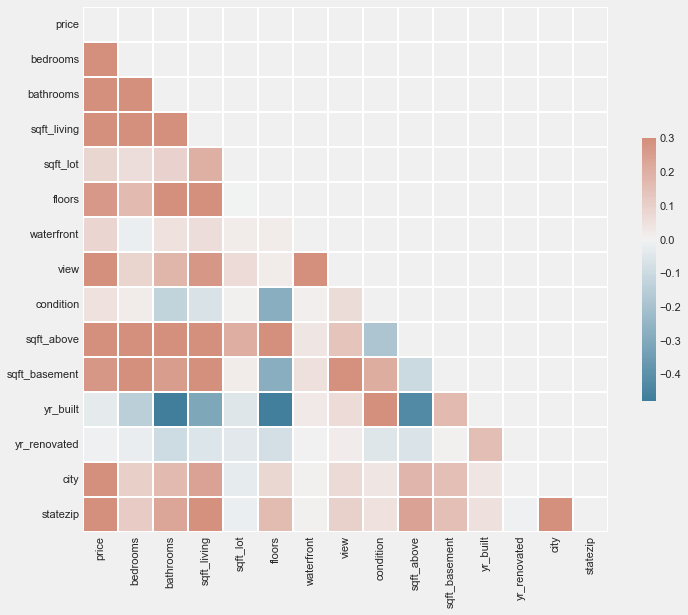

In [ ]:

# plt correlation with df with city and zipcode being traget encoded
corr = df_target_encode.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('../plots/train_target_encode_corr.png')


<AxesSubplot:>

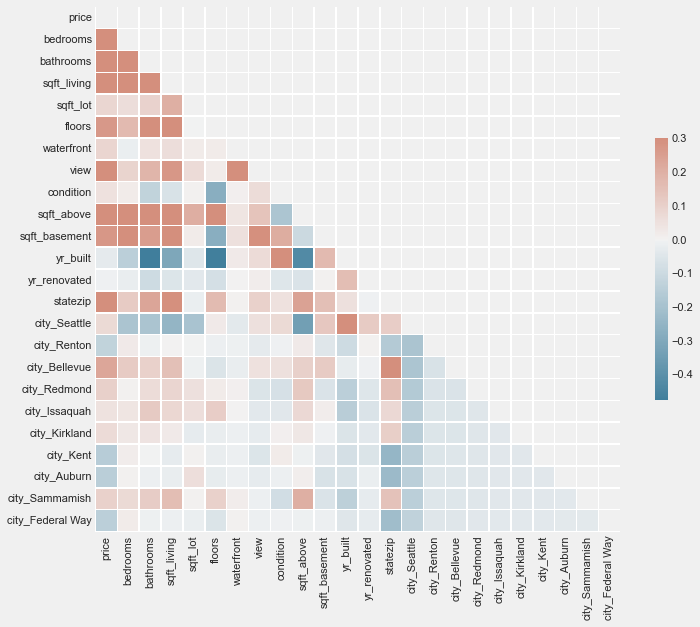

In [ ]:

# plot correlation with df with city and zipcode being traget encoded
corr = df_ohe_city.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('../plots/train_ohe.png')



In [28]:
df.to_csv('../inputs/train_clean.csv')
df_ohe_city.to_csv('../inputs/train_ohe.csv')
df_target_encode.to_csv('../inputs/train_target_encode.csv')